# BINARY CLASS LOGISTIC REGRESSION
<b>Objective:</b> To learn Logistic Regression involving binary class
* Binary Classification
* Cost Function
* Decision Boundary
* Overfitting and Regularization
* Using scikit-learn library for logistic regression

<b>Problem:</b> We will solve two set of problems
1. Linearly Separable Data: Depending upong the scores in two exams predict whether a candidate is admitted to a college.
2. Non Seprarable data using a line: Depending upon two tests for microchips detect the defective ones.

<div class="container" style="width: 100%;">
 <div class="theme-table-image col-sm-6" >
   <img src="./images/linearly_separable_data.png" width=50% align='left'>
 </div>
 <div class="theme-table-image col-sm-6">
   <img src="./images/nonlinearly_separable_data.png" width=50% align='right'>
 </div>
 </div>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt
from scipy.optimize import fmin
from scipy.optimize import fmin_bfgs

In [3]:
def plotData(X, y):
    p1 = plt.plot(X[np.where(y==1),0], X[np.where(y==1),1], marker='+', markersize=9, color='blue')[0]
    p2 = plt.plot(X[np.where(y==0),0], X[np.where(y==0),1], marker='o', markersize=7, color='red')[0]
    return plt, p1, p2

Sigmoid Activation Function
$\sigma(t)=\frac{1}{1+e^{-t}}$

<img src="./images/sigmoid.png" style="float: left; margin-right: 10px;" />

In [ ]:
def sigmoid(z):
    g = np.zeros(z.shape)
    g = expit(z)
    return g

# Simplified Cost Function

We cannot use the same cost function that we used for linear regression because the Logistic Function will cause the output to be wavy, causing many local minima. In other words, it will not be a convex function.

Instead, our cost function for logistic regression looks like:

$J(\theta)=\frac{1}{2m}\Sigma_{i=1}^{m}Cost(h_{\theta}(x^{(i)}),y^{(i)})$

$Cost(h_{\theta}(x),y)=-log(h_{\theta}(x))$ if $y=1$

$Cost(h_{\theta}(x),y)=-log(1-h_{\theta}(x))$ if $y=0$

$Cost(h_{\theta}(x),y)=0$ if $h_{\theta}(x)=y$

$Cost(h_{\theta}(x),y) \rightarrow \infty$ if $y=0$ and $h_{\theta}(x) \rightarrow 1$

$Cost(h_{\theta}(x),y) \rightarrow \infty$ if $y=1$ and $h_{\theta}(x) \rightarrow 0$
<img src=./images/logreg_cf.jpg> If our correct answer $y$ is 0, then the cost function will be 0 if our hypothesis function also outputs 0. If our hypothesis approaches 1, then the cost function will approach infinity.

If our correct answer $y$ is 1, then the cost function will be 0 if our hypothesis function outputs 1. If our hypothesis approaches 0, then the cost function will approach infinity.

Note that writing the cost function in this way guarantees that $J(\theta)$ is convex for logistic regression.

# Cost Function with Regularization and its Gradient
<b>Cost function</b>
The function is also called Binary Cross Entropy

$$J(\theta)=-\frac{1}{2m} \sum_{i=1}^{m}[y^{(i)}log(h_{\theta}(x^{(i)})) + (1-y^{(i)})log(1-h_{\theta}(x^{(i)}))]+\frac{\lambda}{2m}\theta^{2}$$

<b>Cost function in vectorized form</b>

$$h=\sigma(X\theta)$$

$$J(\theta)=-\frac{1}{2m}(y^{T}log(h)+(1-y)^{T}log(1-h))+\frac{\lambda}{2m}\theta^{2}$$

In [ ]:
def costFunction(theta, X, y, lambda_reg):
    m = len(y)
    J = 0
    one = y * np.transpose(np.log( sigmoid( np.dot(X,theta) ) ))
    two = (1-y) * np.transpose(np.log( 1 - sigmoid( np.dot(X,theta) ) ))
    reg = ( float(lambda_reg) / (2*m)) * np.power(theta[1:theta.shape[0]],2).sum()
    J = -(1./m)*(one+two).sum() + reg
    return J 

# Feature Engineering

When the different class of data is linearly separable (separable using a stright line) the out of the box regression algorithms will work fine. However, when the data is not linearly separable, then regression technique will do a poor job. A clever analyst will look at the data, identify the trends and patterns and engineer new input features that will lead to a better classification of data. The function below engineers new polynomial features of a particular degree.

In [ ]:
def mapFeature(X1, X2, degree):
    out = np.ones(( X1.shape[0], sum(range(degree + 2)) )) # could also use ((degree+1) * (degree+2)) / 2 instead of sum
    curr_column = 1
    for i in range(1, degree + 1):
        for j in range(i+1):
            out[:,curr_column] = np.power(X1,i-j) * np.power(X2,j)
            curr_column += 1
    return out

# Plotting Decision Boundaries

In [ ]:
def plotDecisionBoundary(theta, X, y,degree=1):
    plt, p1, p2 = plotData(X[:,1:3], y)
    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([min(X[:,1])-2,  max(X[:,1])+2])
        # Calculate the decision boundary line
        plot_y = (-1./theta[2])*(theta[1]*plot_x + theta[0])
        # Plot, and adjust axes for better viewing
        p3 = plt.plot(plot_x, plot_y)
        # Legend, specific for the exercise
        plt.legend((p1, p2, p3[0]), ('Admitted', 'Not Admitted', 'Decision Boundary'), numpoints=1, handlelength=0.5)
        plt.axis([30, 100, 30, 100])
        plt.show(block=False)
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros(( len(u), len(v) ))
        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = np.dot(mapFeature(np.array([u[i]]), np.array([v[j]]),degree),theta)
        z = np.transpose(z) # important to transpose z before calling contour

        # Plot z = 0
        # Notice you need to specify the level 0
        # we get collections[0] so that we can display a legend properly
        p3 = plt.contour(u, v, z, levels=[0], linewidth=2).collections[0]
        
        # Legend, specific for the exercise
        plt.legend((p1,p2, p3),('y = 1', 'y = 0', 'Decision Boundary'), numpoints=1, handlelength=0)
        plt.show(block=False)

In [ ]:
def predict(theta, X):
    m = X.shape[0]
    p = np.zeros((m, 1))
    sigValue = sigmoid( np.dot(X,theta) )
    p = sigValue >= 0.5
    return p

# Problem Set 1
The data file consists of three columns. The first two columns gives the test score of two exams taken by 100 students and the third column tells if the student was admitted (1) or not (0) admitted to a particular college. Notice that the data is linearly separable.

<b>Recommended Excerscise</b>
* Try regularization (changing the value of $\lambda_{reg}$)
* Try to engineer new features and then run the regression to see if the decision boundaries improves classification.

In [4]:
data = np.loadtxt('./data/admission.csv', delimiter=",")
X = data[:,:2]
y = data[:,2]

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


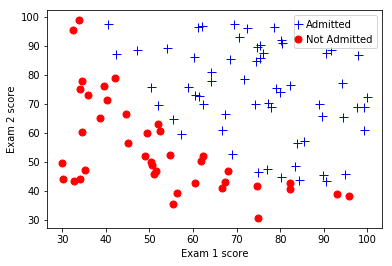

In [5]:
print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.')
plt, p1, p2 = plotData(X, y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((p1, p2), ('Admitted', 'Not Admitted'), numpoints=1, handlelength=0)
plt.show() 

In [ ]:
m,n = X.shape
X_padded = np.column_stack((np.ones((m,1)), X)) 
initial_theta = np.zeros((n+1, 1))
cost = costFunction(initial_theta, X_padded, y, 0)
print('Cost at initial theta (zeros): {:f}'.format(cost))

In [ ]:
lambda_reg=0.0
myargs=(X_padded, y,lambda_reg)
theta = fmin(costFunction, x0=initial_theta, args=myargs)
theta, cost_at_theta, _, _, _, _, _ = fmin_bfgs(costFunction, x0=theta, args=myargs, full_output=True)
print('Cost at theta found by fmin: {:f}'.format(cost_at_theta))
print('theta:'),
print(theta)
plotDecisionBoundary(theta, X_padded, y,degree=1)
plt.show() 

# Problem set 2
The data file consists of three columns. The first two columns give measurements from two quality assurace tests and the third colums include information if the chip was ok (1) or not (0). Notice that the two class of data is not linearly separable and hence we will have to engineer new features. 

In [ ]:
data = np.loadtxt('./data/microchip.csv', delimiter=",")
X = data[:,:2]
y = data[:,2]
plt, p1, p2 = plotData(X, y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend((p1, p2), ('y = 1', 'y = 0'), numpoints=1, handlelength=0)
plt.show()

Feature Engineering: Simple Linear Logistic Regression will not help demarcate teh two class so let us engineer new features. 

In [ ]:
degree=6
X = mapFeature(X[:,0], X[:,1],degree)
m,n = X.shape
print("Shape of X after engineered features",X.shape)
print("Shape of y",y.shape)

In [ ]:
lambda_reg = 0.001

In [ ]:
initial_theta = np.zeros((n, 1))
cost = costFunction(initial_theta, X, y, lambda_reg)
print('Cost at initial theta (zeros): {:f}'.format(cost))
initial_theta = np.zeros((n, 1))

In [ ]:
myargs=(X, y, lambda_reg)
theta = fmin_bfgs(costFunction, x0=initial_theta, args=myargs)

In [ ]:
plotDecisionBoundary(theta, X, y,degree)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('lambda = {:f}'.format(lambda_reg))
p = predict(theta, X)
print('Train Accuracy: {:f}'.format(np.mean(p == y) * 100))

# Solving both the problems using sklearn library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
def print_score(X,Y,logreg):
    predictions=logreg.predict(X)
    print('Accuracy:', accuracy_score(Y, predictions))
    print('Precision:', precision_score(Y, predictions, average='macro'))
    print('Recall:', recall_score(Y, predictions, average='macro'))

In [ ]:
def plot_boundary(X,y,degree,logreg):
    x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
    xs, ys = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))
    xys = mapFeature(xs.ravel(),ys.ravel(),degree)
    Z = logreg.predict(xys).reshape(xs.shape)
    plt.pcolormesh(xs, ys, Z, cmap=plt.cm.Paired)
    plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlim(xs.min(), xs.max())
    plt.ylim(ys.min(), ys.max())
    plt.xticks(())
    plt.yticks(())
    return plt

In [ ]:
#Load the data
data = np.loadtxt('./data/admission.csv', delimiter=",")
X = data[:,:2]
Y = data[:,2]

In [ ]:
degree=1 #Degree of 
lambda_=1e-5 #Rregularaization parameter

In [ ]:
X = mapFeature(X[:,0], X[:,1],degree)
logreg = linear_model.LogisticRegression(C=1/lambda_)
logreg.fit(X, Y)
print_score(X,Y,logreg)
plt=plot_boundary(X,Y,degree,logreg)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
#Load the data
data = np.loadtxt('./data/microchip.csv', delimiter=",")
X = data[:,:2]
Y = data[:,2]

In [ ]:
degree=6
lambda_=1e-5

In [ ]:
X_engineered = mapFeature(X[:,0], X[:,1],degree)
logreg = linear_model.LogisticRegression(C=1/lambda_)
logreg.fit(X_engineered, Y)
print_score(X_engineered,Y,logreg)
plt=plot_boundary(X_engineered,Y,degree,logreg)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Solve the Mushroom or the Breast Cancer clssification problem
[Mushroom Classification Problem](Ex2-MushroomClassification.ipynb)

[Breast Cancer Problem](Ex1-BreastCancerDiagnosis.ipynb)

